In [10]:
# –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω—É–∂–Ω—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

In [11]:
# —á–∏—Ç–∞–µ–º Excel-—Ñ–∞–π–ª
df = pd.read_excel("Dataset 1.xlsx", sheet_name="RZD_news")

In [12]:
# –∏—Å–∫–ª—é—á–∞–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –æ–ø–µ—Ä–∞—Ç–æ—Ä ‚Äî –ê–û "–ü–ì–ö"
df = df[df["–û–ø–µ—Ä–∞—Ç–æ—Ä"] != '–ê–û "–ü–ì–ö"']

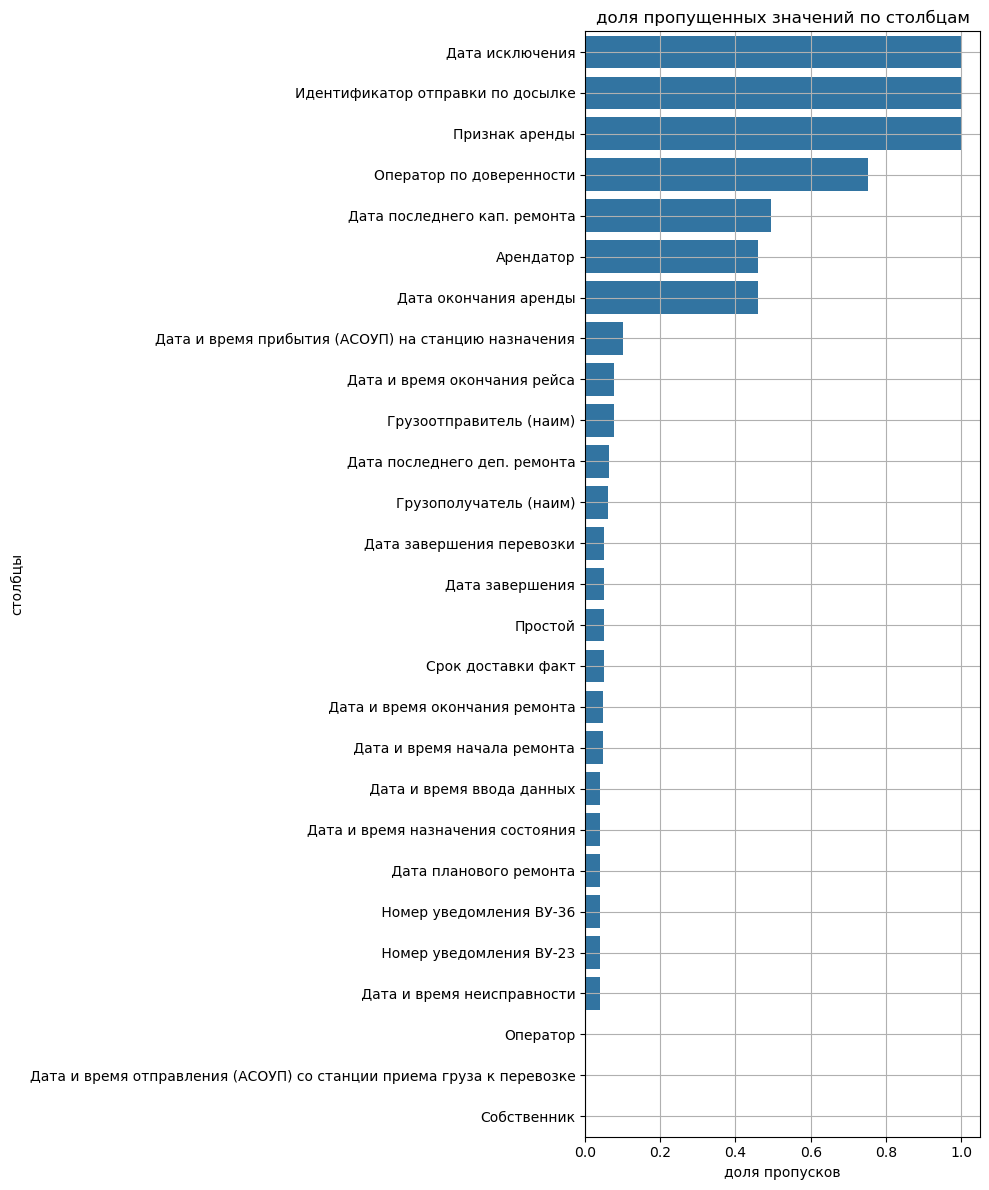

In [13]:
# –≥–ª—è–Ω–µ–º –∫–∞–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã —Å–æ–¥–µ—Ä–∂–∞—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
missing_values = df.isnull().mean().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]  # —É–±–∏—Ä–∞–µ–º –Ω—É–ª–∏

# —Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(10, 12))
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.title("–¥–æ–ª—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º")
plt.xlabel("–¥–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤")
plt.ylabel("—Å—Ç–æ–ª–±—Ü—ã")
plt.grid(True)
plt.tight_layout()
plt.show()


# –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ ‚Äî –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –æ–∫–æ–Ω—á–∞–Ω–∏—è —Ä–µ–π—Å–∞, –°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç, –î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –ø–µ—Ä–µ–≤–æ–∑–∫–∏ –∏ —Ç.–¥.
# —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ –¥–ª—è –ª–æ–≥–∏—Å—Ç–∏–∫–∏ ‚Äî –Ω–µ –≤—Å–µ —Ä–µ–π—Å—ã –º–æ–≥—É—Ç –±—ã—Ç—å –∑–∞–≤–µ—Ä—à–µ–Ω—ã –Ω–∞ –º–æ–º–µ–Ω—Ç –≤—ã–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö.

In [14]:
# —É–¥–∞–ª–∏–º —Å—Ç–æ–ª–±—Ü—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –±–æ–ª—å—à–µ –ø–æ–ª–æ–≤–∏–Ω—ã –∑–Ω–∞—á–µ–Ω–∏–π ‚Äî –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ

# —Å–Ω–∞—á–∞–ª–∞ —Å—á–∏—Ç–∞–µ–º –¥–æ–ª—é –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ –∫–∞–∂–¥–æ–º—É —Å—Ç–æ–ª–±—Ü—É
missing_ratio = df.isnull().mean()

# —Ñ–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ —Ç–µ, –≥–¥–µ –±–æ–ª—å—à–µ 0.5 (—Ç–æ –µ—Å—Ç—å 50%)
cols_to_drop = missing_ratio[missing_ratio > 0.5].index

# –∏ —Ç–µ–ø–µ—Ä—å —É–¥–∞–ª—è–µ–º —ç—Ç–∏ —Å—Ç–æ–ª–±—Ü—ã –∏–∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
df = df.drop(columns=cols_to_drop)

# –Ω–∞ –≤—Å—è–∫–∏–π —Å–ª—É—á–∞–π –≤—ã–≤–µ–¥–µ–º, —á—Ç–æ –∏–º–µ–Ω–Ω–æ —É–¥–∞–ª–∏–ª–∏
print("—É–¥–∞–ª–µ–Ω—ã —Å—Ç–æ–ª–±—Ü—ã —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ > 50%:")
print(list(cols_to_drop))

# —Ç–∞–∫–∂–µ —É–¥–∞–ª–∏–º —Å—Ç–æ–ª–±—Ü—ã –±–µ–∑ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
df = df.dropna(subset=["–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç"])

—É–¥–∞–ª–µ–Ω—ã —Å—Ç–æ–ª–±—Ü—ã —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ > 50%:
['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ—Ç–ø—Ä–∞–≤–∫–∏ –ø–æ –¥–æ—Å—ã–ª–∫–µ', '–î–∞—Ç–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏—è', '–ü—Ä–∏–∑–Ω–∞–∫ –∞—Ä–µ–Ω–¥—ã', '–û–ø–µ—Ä–∞—Ç–æ—Ä –ø–æ –¥–æ–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏']


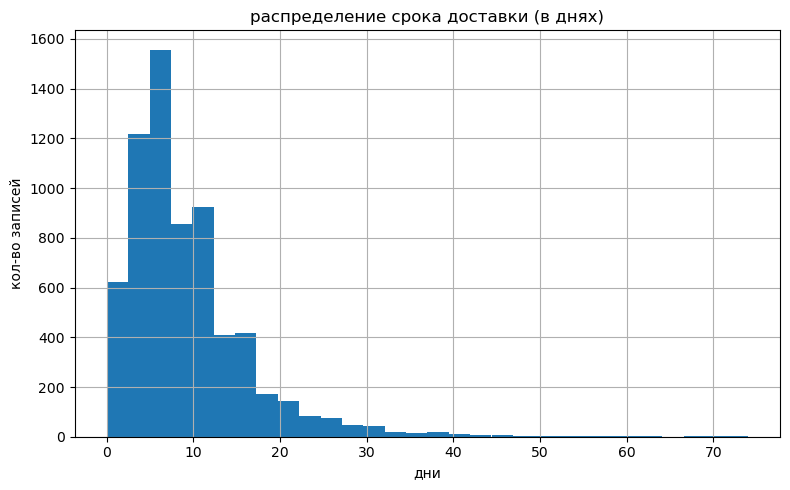

In [15]:
# —Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—ë–Ω —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏
plt.figure(figsize=(8, 5))
df["–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç"].dropna().hist(bins=30)  # —É–±–∏—Ä–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏, —á—Ç–æ–±—ã –Ω–µ –º–µ—à–∞–ª–∏—Å—å
plt.title("—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–æ–∫–∞ –¥–æ—Å—Ç–∞–≤–∫–∏ (–≤ –¥–Ω—è—Ö)")
plt.xlabel("–¥–Ω–∏")
plt.ylabel("–∫–æ–ª-–≤–æ –∑–∞–ø–∏—Å–µ–π")
plt.grid(True)
plt.tight_layout()
plt.show()


# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —è–≤–Ω–æ –Ω–µ—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ ‚Äî –º–Ω–æ–≥–æ –¥–æ—Å—Ç–∞–≤–æ–∫ —É–∫–ª–∞–¥—ã–≤–∞—é—Ç—Å—è –≤ 5‚Äì10 –¥–Ω–µ–π, –Ω–æ –µ—Å—Ç—å –∏ —Ö–≤–æ—Å—Ç –≤–ø—Ä–∞–≤–æ, –≥–¥–µ —Å—Ä–æ–∫–∏ —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–µ.

In [ ]:
# —Å –ø–æ–º–æ—â—å—é catboost –æ–ø—Ä–µ–¥–µ–ª–∏–º 15 —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö —Ñ–∏—á –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.
# –≤—ã–±–æ—Ä catboost –ø–æ–∑–≤–æ–ª—è–µ—Ç —É–¥–æ–±–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å —Å—Ä–∞–∑—É –∏ —Å —á–∏—Å–ª–æ–≤—ã–º–∏ –∏ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ —á–∏—Å–ª–∞–º–∏


# —Ä–∞–∑–¥–µ–ª–∏–º –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ç–∞—Ä–≥–µ—Ç
X = df.drop(columns=["–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç"])
y = df["–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç"]

# catboost –Ω–µ —É–º–µ–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –ø—É—Å—Ç—ã–º–∏ –¥–∞—Ç–∞–º–∏, —Ç–∞–∫ —á—Ç–æ –Ω–∞–π–¥—ë–º –≤—Å–µ datetime-–∫–æ–ª–æ–Ω–∫–∏
datetime_cols = X.select_dtypes(include=["datetime64"]).columns.tolist()

# –∏ –∑–∞–º–µ–Ω–∏–º –∏—Ö –Ω–∞ timestamp
X[datetime_cols] = X[datetime_cols].fillna(pd.Timestamp("1970-01-01"))
X[datetime_cols] = X[datetime_cols].astype(str)

# –æ–ø—Ä–µ–¥–µ–ª–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

# –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ —Å—Ç—Ä–æ–∫–∏ (–∏ NaN –≤ 'missing')
for col in cat_features:
    X[col] = X[col].astype(str).fillna("missing")

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# —Å–æ–∑–¥–∞—ë–º Pool –¥–ª—è CatBoost
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
model = CatBoostRegressor(verbose=100, random_state=42)
model.fit(train_pool)

# —Å–º–æ—Ç—Ä–∏–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance = model.get_feature_importance(prettified=True)
print(feature_importance.head(15))  # –º–æ–∂–Ω–æ –±–æ–ª—å—à–µ, –µ—Å–ª–∏ —Ö–æ—á–µ—à—å

Learning rate set to 0.053348
0:	learn: 7.2665767	total: 199ms	remaining: 3m 19s
100:	learn: 4.3382981	total: 5.57s	remaining: 49.6s
200:	learn: 3.8136248	total: 10.7s	remaining: 42.6s
300:	learn: 3.5021723	total: 16s	remaining: 37.1s
400:	learn: 3.2933302	total: 21.3s	remaining: 31.8s
500:	learn: 3.1011160	total: 26.5s	remaining: 26.4s
600:	learn: 2.9661197	total: 31.8s	remaining: 21.1s
700:	learn: 2.8321325	total: 37.1s	remaining: 15.8s
800:	learn: 2.7090629	total: 42.5s	remaining: 10.6s
900:	learn: 2.6128069	total: 47.8s	remaining: 5.25s
999:	learn: 2.5150281	total: 53.4s	remaining: 0us
                                           Feature Id  Importances
0                             –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –Ω–∞–∫–ª–∞–¥–Ω–æ–π    13.451698
1                                     –î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è    10.896827
2                                         –î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞     9.807936
3                               –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)     7.947471
4    

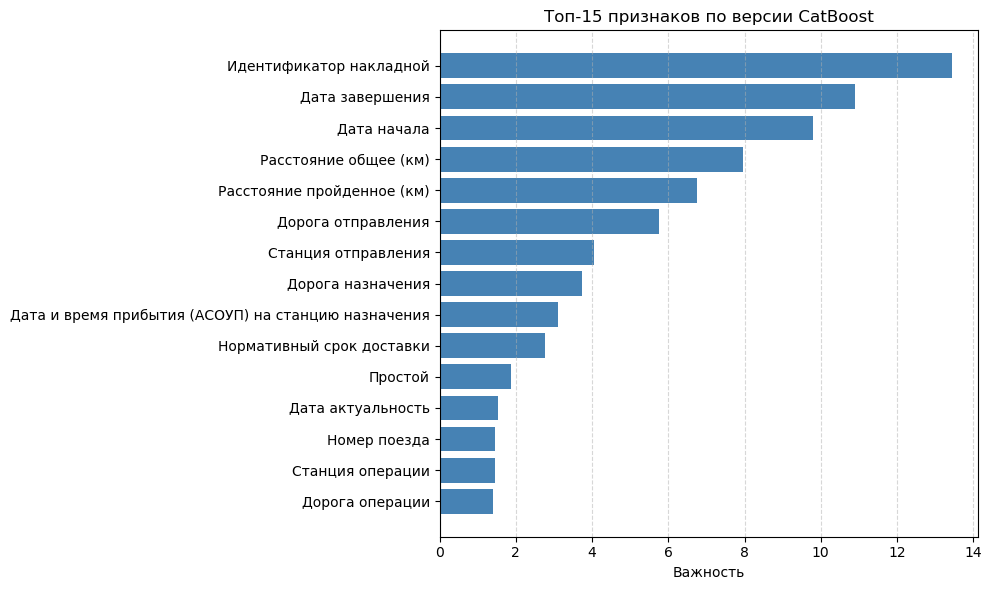

In [39]:
import matplotlib.pyplot as plt

# –æ—Ç–±–µ—Ä—ë–º —Ç–æ–ø-15 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏
top_n = 15
top_features = feature_importance.head(top_n)

# —Å–æ–∑–¥–∞—ë–º –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–π bar-–≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature Id'], top_features['Importances'], color='steelblue')
plt.xlabel("–í–∞–∂–Ω–æ—Å—Ç—å")
plt.title(f"–¢–æ–ø-{top_n} –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –≤–µ—Ä—Å–∏–∏ CatBoost")
plt.gca().invert_yaxis()  # –≤–∞–∂–Ω—ã–µ –≤–≤–µ—Ä—Ö—É
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [17]:
# —Å–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ top-15 –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏ –∏ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
top_features = [
    "–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –Ω–∞–∫–ª–∞–¥–Ω–æ–π", "–î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è", "–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞",
    "–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)", "–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –ø—Ä–æ–π–¥–µ–Ω–Ω–æ–µ (–∫–º)",
    "–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è", "–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è", "–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è",
    "–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –ø—Ä–∏–±—ã—Ç–∏—è (–ê–°–û–£–ü) –Ω–∞ —Å—Ç–∞–Ω—Ü–∏—é –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è",
    "–ù–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏", "–ü—Ä–æ—Å—Ç–æ–π", "–î–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å",
    "–ù–æ–º–µ—Ä –ø–æ–µ–∑–¥–∞", "–°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏", "–î–æ—Ä–æ–≥–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏", "–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç"
]

# —Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
unique_counts = {
    feature: df[feature].nunique() for feature in top_features if feature in df.columns
}

# –ø—Ä–µ–≤—Ä–∞—â–∞–µ–º –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
unique_counts_df = pd.DataFrame.from_dict(unique_counts, orient="index", columns=["–ö–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π"])
unique_counts_df.index.name = "–ü—Ä–∏–∑–Ω–∞–∫"

# –≤—ã–≤–æ–¥–∏–º
unique_counts_df.sort_values(by="–ö–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π", ascending=False)

–ö–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
–ü—Ä–∏–∑–Ω–∞–∫                                                                       
–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –Ω–∞–∫–ª–∞–¥–Ω–æ–π                                                   6539
–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –ø—Ä–∏–±—ã—Ç–∏—è (–ê–°–û–£–ü) –Ω–∞ —Å—Ç–∞–Ω—Ü–∏—é –Ω–∞–∑–Ω–∞—á...                        2784
–ù–æ–º–µ—Ä –ø–æ–µ–∑–¥–∞                                                               904
–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)                                                      526
–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –ø—Ä–æ–π–¥–µ–Ω–Ω–æ–µ (–∫–º)                                                 521
–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è                                                        431
–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞                                                                232
–ù–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏                                                  221
–î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è                                                            213
–î–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å                                                          197
–°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏                                                           116
–ü—Ä–æ—Å—Ç–æ–π                                                                     64
–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç                                                          64
–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è                                                          23
–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è                                                           20
–î–æ—Ä–æ–≥–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏                                                             16

In [18]:
# —É–¥–∞–ª—è–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã

df = df.drop(columns=[
    "–ù–æ–º–µ—Ä –Ω–∞–∫–ª–∞–¥–Ω–æ–π", "–ù–æ–º–µ—Ä –≤–∞–≥–æ–Ω–∞", "–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –Ω–∞–∫–ª–∞–¥–Ω–æ–π", "–ù–æ–º–µ—Ä –ø–æ–µ–∑–¥–∞"
], errors="ignore")

# —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ "–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –ø—Ä–∏–±—ã—Ç–∏—è (–ê–°–û–£–ü) –Ω–∞ —Å—Ç–∞–Ω—Ü–∏—é –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è", 
# —Ç–∞–∫ –∫–∞–∫ –æ–Ω –ø–æ—á—Ç–∏ –∫–æ–ø–∏—Ä—É–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫ "–î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è" –∏ –≤ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–µ –±—É–¥–µ—Ç –∏–≥—Ä–∞—Ç—å —Ä–æ–ª–∏

df = df.drop(columns=[
    "–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –ø—Ä–∏–±—ã—Ç–∏—è (–ê–°–û–£–ü) –Ω–∞ —Å—Ç–∞–Ω—Ü–∏—é –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è"
], errors="ignore")


In [19]:
# –ü—Ä–∏–∑–Ω–∞–∫–∏ "–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)" –∏ "–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –ø—Ä–æ–π–¥–µ–Ω–Ω–æ–µ (–∫–º)" –ø–æ —Å—É—Ç–∏ –¥—É–±–ª–∏—Ä—É—é—Ç –¥—Ä—É–≥ –¥—Ä—É–≥–∞
# –ü—Ä–æ–≤–µ—Ä–∏–º, —Ç–∞–∫ –ª–∏ —ç—Ç–æ
mask = df["–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –ø—Ä–æ–π–¥–µ–Ω–Ω–æ–µ (–∫–º)"] != df["–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)"]
print("–ù–µ—Å–æ–≤–ø–∞–¥–µ–Ω–∏–π:", mask.sum())

# –£ –Ω–∞—Å –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π—Å–µ 187 —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –æ–±—â–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –Ω–µ —Ä–∞–≤–Ω–æ –ø—Ä–æ–π–¥–µ–Ω–Ω–æ–º—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é
# –≠—Ç–æ –º–æ–≥–ª–æ –±—ã –±—ã—Ç—å –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º, –µ—Å–ª–∏ –±—ã –≤ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö —Å–æ–¥–µ—Ä–∂–∞–ª–∏—Å—å –Ω–µ–∑–∞–∫–æ–Ω—á–µ–Ω–Ω—ã–µ —Ä–µ–π—Å—ã,
# –Ω–æ —Ç–∞–∫–æ–≤—ã—Ö —É –Ω–∞—Å –Ω–µ—Ç. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –¥–∞–Ω–Ω—ã–µ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ. –ü—Ä–æ–≤–µ—Ä–∏–º, –∫–∞–∫–∞—è –¥–æ–ª—è –ø–æ–¥–æ–±–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –Ω–∞—à–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ

print("–ò–∑ –æ–±—â–µ–≥–æ:", len(df), f"({mask.sum() / len(df) * 100:.2f}%)")

# 2.8% –¥–∞–Ω–Ω—ã—Ö - –Ω–µ–±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å, —Ç–∞–∫ —á—Ç–æ –º–æ–∂–µ—Ç —É–¥–∞–ª–∏—Ç—å –∏—Ö, —á—Ç–æ–±—ã –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ —Å–æ–¥–µ—Ä–∂–∞–ª–∏—Å—å —Ç–æ–ª—å–∫–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
df = df[~mask].copy()

# –ü–æ—Å–ª–µ —Ç–æ–≥–æ, –∫–∞–∫ –º—ã —É–¥–∞–ª–∏–ª–∏ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å –æ–¥–Ω—É –∏–∑ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –≤—Å–µ-—Ç–∞–∫–∏ –¥—É–±–ª–∏—Ä—É—é—Ç –¥—Ä—É–≥ –¥—Ä—É–≥–∞
df = df.drop(columns=["–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –ø—Ä–æ–π–¥–µ–Ω–Ω–æ–µ (–∫–º)"], errors="ignore")


–ù–µ—Å–æ–≤–ø–∞–¥–µ–Ω–∏–π: 187
–ò–∑ –æ–±—â–µ–≥–æ: 6674 (2.80%)


In [20]:
# –ü—Ä–∏–∑–Ω–∞–∫ –¥–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –ø–æ —Å—É—Ç–∏ —Ä–∞–≤–µ–Ω –¥–∞—Ç–µ –Ω–∞—á–∞–ª–∞ + —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –æ–Ω –Ω–µ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª–∞
# —É–¥–∞–ª–∏–º –µ–≥–æ
df = df.drop(columns=["–î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è"])


In [21]:
# –ü—Ä–∏–∑–Ω–∞–∫ –¥–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç–∏ - –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, –Ω–∞ –∫–∞–∫–æ–π –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ –¥–∞–Ω–Ω—ã–µ –∞–∫—Ç—É–∞–ª—å–Ω—ã.
# –ï—Å–ª–∏ –≤–¥—Ä—É–≥ —ç—Ç–∞ –¥–∞—Ç–∞ –±—É–¥–µ—Ç —Ä–∞–Ω—å—à–µ, —á–µ–º –∫–æ–Ω–µ—Ü —Ä–µ–π—Å–∞ - –¥–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ –±—É–¥–µ—Ç —Å—á–∏—Ç–∞—Ç—å –Ω–µ–∞–∫—Ç—É–∞–ª—å–Ω—ã–º–∏
# –ø—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ —Ç–∞–∫–æ–≥–æ –Ω–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –≤ –Ω–∞—à–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ
# —Å–Ω–∞—á–∞–ª–∞ —É–±–µ–¥–∏–º—Å—è, —á—Ç–æ —Ç–∏–ø—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ
df["–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞"] = pd.to_datetime(df["–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞"], errors="coerce")
df["–î–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å"] = pd.to_datetime(df["–î–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å"], errors="coerce")

# —Å—á–∏—Ç–∞–µ–º —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫—É—é –¥–∞—Ç—É –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è = –¥–∞—Ç–∞ –Ω–∞—á–∞–ª–∞ + —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏
df["–ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º–∞—è –¥–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è"] = df["–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞"] + pd.to_timedelta(df["–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç"], unit="D")

# —Å–æ–∑–¥–∞—ë–º –º–∞—Å–∫—É, –≥–¥–µ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º–∞—è –¥–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è >= –¥–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç–∏
mask = df["–ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º–∞—è –¥–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è"] >= df["–î–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å"]

# –≤—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≥–¥–µ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–µ > –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç–∏: {mask.sum()} –∏–∑ {len(df)} ({(mask.sum() / len(df)) * 100:.2f}%)")

# –†–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è –µ—Å—Ç—å, –Ω–æ –∏—Ö –Ω–µ–º–Ω–æ–≥–æ. –£–¥–∞–ª–∏–º –ø–æ–¥–æ–±–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ –∏ —Å–∞–º –ø—Ä–∏–∑–Ω–∞–∫ "–î–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å"

df = df[~mask].copy()

df = df.drop(columns=["–î–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å"])
df = df.drop(columns=["–ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º–∞—è –¥–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è"])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≥–¥–µ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–µ > –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç–∏: 113 –∏–∑ 6487 (1.74%)


In [22]:
df.head()

–†–æ–¥ –≤–∞–≥–æ–Ω–∞ –ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏—è —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞ –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞  \
2   –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)       2024-02-15 22:23:00   
4   –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)       2024-02-11 15:01:00   
24  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)       2024-01-19 16:09:00   
28  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)       2024-01-15 20:22:00   
29  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)       2024-01-18 18:02:00   

   –ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è       –î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è  \
2                –ú–û–ù–ì–û–õ–ò–Ø   –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
4                –ú–û–ù–ì–û–õ–ò–Ø   –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
24   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è    –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   
28   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è    –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   
29   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è    –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   

                                 –°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è  \
2    –ù–∞—É—à–∫–∏ (–≠–∫—Å–ø.–£–±–∂–¥:–£–ª–∞–∞–Ω–±–∞–∞—Ç–∞—Ä –ò –î–∞–ª–µ–µ) (937107)   
4   –ù–∞—É—à–∫–∏ (–≠–∫—Å–ø.–£–±–∂–¥: –°.–ë–∞–∞—Ç–∞—Ä-–£.–ë–∞—Ç(–ò—Å–∫–ª) (937003)   
24                                    –®–µ–¥–æ–∫ (535907)   
28                                 –ó–∞—Ä–µ—á–Ω–∞—è (510702)   
29                          –†–æ—Å—Ç–æ–≤-–¢–æ–≤–∞—Ä–Ω—ã–π (510100)   

   –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –æ–∫–æ–Ω—á–∞–Ω–∏—è —Ä–µ–π—Å–∞      –ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è  \
2                           NaT  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)   
4           2024-02-19 11:30:00  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)   
24          2024-01-28 03:46:00  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)   
28          2024-01-23 14:01:00  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)   
29          2024-01-30 19:31:00  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)   

          –î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è         –°—Ç–∞–Ω—Ü–∏—è –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è  ...  \
2   –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)            –ó–∞–ª–∞—Ä–∏ (930409)  ...   
4   –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)            –ó–∞–ª–∞—Ä–∏ (930409)  ...   
24      –Æ–∂–Ω–æ-–£—Ä–∞–ª—å—Å–∫–∞—è (80)  –ú–µ—Ç–∞–ª–ª—É—Ä–≥–∏—á–µ—Å–∫–∞—è (801208)  ...   
28   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)             –®–µ–¥–æ–∫ (535907)  ...   
29   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)             –®–µ–¥–æ–∫ (535907)  ...   

     –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –æ–∫–æ–Ω—á–∞–Ω–∏—è —Ä–µ–º–æ–Ω—Ç–∞                –°—Ç–∞–Ω—Ü–∏—è –ø–µ—Ä–µ–¥–∞—á–∏-–æ—Ç—Ü–µ–ø–∫–∏  \
2               2024-01-20 16:33:00                        –ë–ê–†–ù–ê–£–õ (840109)   
4               2022-06-07 12:15:00                       –ê–ß–ò–ù–°–ö 2 (883809)   
24              2023-11-23 16:11:00                          –Æ–î–ò–ù–û (250001)   
28              2023-11-22 16:00:00  –°–ê–ù–ö–¢-–ü–ï–¢–ï–†–ë–£–†–ì-–¢–û–í.-–í–ò–¢–ï–ë–°–ö–ò–ô (33502)   
29              2022-11-28 17:55:00                  –°–û–õ–¨–í–´–ß–ï–ì–û–î–°–ö (280007)   

     –ù–æ–º–µ—Ä —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –í–£-23  –ù–æ–º–µ—Ä —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –í–£-36  –ü–µ—Ä–µ–≤–æ–∑–∫–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞  \
2                     1142.0                    123.0                False   
4                      260.0                    290.0                False   
24                     631.0                     78.0                False   
28                       0.0                    151.0                False   
29                    1192.0                      1.0                False   

                        –û–ø–µ—Ä–∞—Ç–æ—Ä  –î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –ø–µ—Ä–µ–≤–æ–∑–∫–∏  \
2   –û–û–û "–ì–†–£–ü–ü–ê "–ü–†–û–î–û–í–û–õ–¨–°–¢–í–ò–ï"        2024-02-20 15:09:00   
4   –û–û–û "–ì–†–£–ü–ü–ê "–ü–†–û–î–û–í–û–õ–¨–°–¢–í–ò–ï"        2024-02-19 11:30:00   
24           –ê–û "–ï–í–†–û–°–ò–ë –°–ü–ë-–¢–°"        2024-01-28 03:46:00   
28         

In [23]:
df.shape

(6374, 97)

In [24]:
# —Å–ø–∏—Å–æ–∫ —Ñ–∏–Ω–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
final_features = [
    "–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞", "–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)", "–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è", 
    "–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è", "–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è", "–ù–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏", "–ü—Ä–æ—Å—Ç–æ–π", 
    "–°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏", "–î–æ—Ä–æ–≥–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏", "–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç"
]



# –≤—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ –Ω—É–∂–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏
df = df[final_features]

In [25]:
# –ø—Ä–æ–≤–µ—Ä–∏–º —É–Ω–∏–∫–∞–ª—å–Ω–æ—Å—Ç—å —Å—Ç–∞–Ω—Ü–∏–π –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è, –æ–ø–µ—Ä–∞—Ü–∏–∏ –∏ –¥–æ—Ä–æ–≥ –æ–ø–µ—Ä–∞—Ü–∏–∏
for col in ["–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è", "–°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏", "–î–æ—Ä–æ–≥–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏"]:
    print(f"{col}: {df[col].nunique()} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π")
# –í –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö 431 —É–Ω–∏–∫–∞–ª—å–Ω–∞—è —Å—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è, —ç—Ç–æ —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ.
# –°–æ–∫—Ä–∞—Ç–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–æ 31: 30 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å—Ç–∞–Ω—Ü–∏–π –∏ "–¥—Ä—É–≥–∏—Ö"
top_stations = df["–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è"].value_counts().nlargest(30).index
df["–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è"] = df["–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è"].apply(lambda x: x if x in top_stations else "–¥—Ä—É–≥–∞—è")



–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è: 431 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
–°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏: 106 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
–î–æ—Ä–æ–≥–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏: 16 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π


In [26]:
# –ù–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ –Ω–æ—Ä–º–∞—Ç–∏–≤ –≤ –¥–Ω—è—Ö, —á—Ç–æ–±—ã –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç —Ç–∏–ø–∞ datetime
# —É–±–µ–∂–¥–∞–µ–º—Å—è, —á—Ç–æ –æ–±–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ datetime
df["–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞"] = pd.to_datetime(df["–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞"], errors="coerce")
df["–ù–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏"] = pd.to_datetime(df["–ù–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏"], errors="coerce")

# —Å—á–∏—Ç–∞–µ–º —Ä–∞–∑–Ω–∏—Ü—É –≤ –¥–Ω—è—Ö
df["–ù–æ—Ä–º–∞—Ç–∏–≤ –≤ –¥–Ω—è—Ö"] = (df["–ù–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏"] - df["–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞"]).dt.days

# —É–¥–∞–ª—è–µ–º –¥–∞—Ç—É
df = df.drop(columns=["–ù–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏"])

In [27]:
# –§–∏–Ω–∞–ª—å–Ω—ã–º –¥–µ–π—Å—Ç–≤–∏–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞—Ç—É –Ω–∞—á–∞–ª–∞ –≤ –¥–µ–Ω—å, –º–µ—Å—è—Ü –∏ –≥–æ–¥
# –∏–∑–≤–ª–µ–∫–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏
df["–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –Ω–∞—á–∞–ª–∞"] = df["–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞"].dt.weekday  # 0 = –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫
df["–ú–µ—Å—è—Ü –Ω–∞—á–∞–ª–∞"] = df["–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞"].dt.month
df["–î–µ–Ω—å –º–µ—Å—è—Ü–∞ –Ω–∞—á–∞–ª–∞"] = df["–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞"].dt.day
df["–†–∞–±–æ—á–∏–π –¥–µ–Ω—å"] = df["–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –Ω–∞—á–∞–ª–∞"].apply(lambda x: 1 if x < 5 else 0)

# —É–¥–∞–ª—è–µ–º —Å–∞–º—É –¥–∞—Ç—É
df = df.drop(columns=["–î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞"])

In [28]:
df.shape

(6374, 13)

In [29]:

# —Å–Ω–æ–≤–∞ —Å—á–∏—Ç–∞–µ–º –¥–æ–ª—é –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
df.isnull().mean().sort_values(ascending=False)

# –ø–æ—Å–ª–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ –æ—Å—Ç–∞–ª–æ—Å—å

–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)    0.0
–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è       0.0
–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è      0.0
–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è        0.0
–ü—Ä–æ—Å—Ç–æ–π                  0.0
–°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏         0.0
–î–æ—Ä–æ–≥–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏          0.0
–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç       0.0
–ù–æ—Ä–º–∞—Ç–∏–≤ –≤ –¥–Ω—è—Ö          0.0
–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –Ω–∞—á–∞–ª–∞       0.0
–ú–µ—Å—è—Ü –Ω–∞—á–∞–ª–∞             0.0
–î–µ–Ω—å –º–µ—Å—è—Ü–∞ –Ω–∞—á–∞–ª–∞       0.0
–†–∞–±–æ—á–∏–π –¥–µ–Ω—å             0.0
dtype: float64

In [30]:
df.head()

–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)       –î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è  \
2                     913  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
4                     907  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
24                   2652   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   
28                    428   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   
29                    439   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   

                                 –°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è        –î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è  \
2                                             –¥—Ä—É–≥–∞—è  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
4   –ù–∞—É—à–∫–∏ (–≠–∫—Å–ø.–£–±–∂–¥: –°.–ë–∞–∞—Ç–∞—Ä-–£.–ë–∞—Ç(–ò—Å–∫–ª) (937003)  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
24                                    –®–µ–¥–æ–∫ (535907)      –Æ–∂–Ω–æ-–£—Ä–∞–ª—å—Å–∫–∞—è (80)   
28                                            –¥—Ä—É–≥–∞—è   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   
29                                            –¥—Ä—É–≥–∞—è   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   

    –ü—Ä–æ—Å—Ç–æ–π           –°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏          –î–æ—Ä–æ–≥–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏  \
2       1.0            –ó–∞–ª–∞—Ä–∏ (930409)  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
4       2.0            –ó–∞–ª–∞—Ä–∏ (930409)  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
24     24.0  –ú–µ—Ç–∞–ª–ª—É—Ä–≥–∏—á–µ—Å–∫–∞—è (801208)      –Æ–∂–Ω–æ-–£—Ä–∞–ª—å—Å–∫–∞—è (80)   
28     29.0             –®–µ–¥–æ–∫ (535907)   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   
29     22.0             –®–µ–¥–æ–∫ (535907)   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   

    –°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç  –ù–æ—Ä–º–∞—Ç–∏–≤ –≤ –¥–Ω—è—Ö  –î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –Ω–∞—á–∞–ª–∞  –ú–µ—Å—è—Ü –Ω–∞—á–∞–ª–∞  \
2                  5.0                7                   3             2   
4                  8.0                6                   6             2   
24                 9.0               12                   4             1   
28                 8.0                8                   0             1   
29                12.0               12                   3             1   

    –î–µ–Ω—å –º–µ—Å—è—Ü–∞ –Ω–∞—á–∞–ª–∞  –†–∞–±–æ—á–∏–π –¥–µ–Ω—å  
2                   15             1  
4                   11             0  
24                  19             1  
28                  15             1  
29                  18             1

In [31]:
# –ø—Ä–æ–≤–µ—Ä–∏–º —Ç–∏–ø—ã, —á—Ç–æ–±—ã —É–¥–æ—Å—Ç–æ–≤–µ—Ä–∏—Ç—å—Å—è, —á—Ç–æ –Ω–µ –Ω–∞–¥–æ –∏—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞—Ç—å.
df.dtypes


–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)      int64
–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è        object
–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è       object
–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è         object
–ü—Ä–æ—Å—Ç–æ–π                  float64
–°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏          object
–î–æ—Ä–æ–≥–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏           object
–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç       float64
–ù–æ—Ä–º–∞—Ç–∏–≤ –≤ –¥–Ω—è—Ö            int64
–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –Ω–∞—á–∞–ª–∞         int32
–ú–µ—Å—è—Ü –Ω–∞—á–∞–ª–∞               int32
–î–µ–Ω—å –º–µ—Å—è—Ü–∞ –Ω–∞—á–∞–ª–∞         int32
–†–∞–±–æ—á–∏–π –¥–µ–Ω—å               int64
dtype: object

In [32]:
# –ù–∞ –≤—Å—è–∫–∏–π —Å–æ—É—á–∞–π –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º –≤—Å–µ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

from sklearn.preprocessing import StandardScaler

# –æ–ø—Ä–µ–¥–µ–ª—è–µ–º —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º –∏—Ö
scaler = StandardScaler()
X_scaled_numeric = pd.DataFrame(
    scaler.fit_transform(df[numeric_cols]),
    columns=numeric_cols,
    index=df.index  # —á—Ç–æ–±—ã –∏–Ω–¥–µ–∫—Å—ã —Å–æ–≤–ø–∞–¥–∞–ª–∏
)

# —Å–æ–±–∏—Ä–∞–µ–º –æ–±—Ä–∞—Ç–Ω–æ: –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ + –æ—Å—Ç–∞–ª—å–Ω—ã–µ (–∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∏ –¥—Ä.)
X_non_numeric = df.drop(columns=numeric_cols)
X_scaled_final = pd.concat([X_scaled_numeric, X_non_numeric], axis=1)



"–ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–æ–∏–∑–≤–æ–¥–∏–ª–∞—Å—å –¥–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω–∞ –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏–ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ, –∞ –±—ã–ª–∞ –æ—Å–Ω–æ–≤–∞–Ω–∞ –∏—Å–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∞ –¥–æ—Å—Ç—É–ø–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö —Å—Ç—Ä–æ–∫–∏."

In [33]:
df.head()

–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)       –î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è  \
2                     913  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
4                     907  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
24                   2652   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   
28                    428   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   
29                    439   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   

                                 –°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è        –î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è  \
2                                             –¥—Ä—É–≥–∞—è  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
4   –ù–∞—É—à–∫–∏ (–≠–∫—Å–ø.–£–±–∂–¥: –°.–ë–∞–∞—Ç–∞—Ä-–£.–ë–∞—Ç(–ò—Å–∫–ª) (937003)  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
24                                    –®–µ–¥–æ–∫ (535907)      –Æ–∂–Ω–æ-–£—Ä–∞–ª—å—Å–∫–∞—è (80)   
28                                            –¥—Ä—É–≥–∞—è   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   
29                                            –¥—Ä—É–≥–∞—è   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   

    –ü—Ä–æ—Å—Ç–æ–π           –°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏          –î–æ—Ä–æ–≥–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏  \
2       1.0            –ó–∞–ª–∞—Ä–∏ (930409)  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
4       2.0            –ó–∞–ª–∞—Ä–∏ (930409)  –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
24     24.0  –ú–µ—Ç–∞–ª–ª—É—Ä–≥–∏—á–µ—Å–∫–∞—è (801208)      –Æ–∂–Ω–æ-–£—Ä–∞–ª—å—Å–∫–∞—è (80)   
28     29.0             –®–µ–¥–æ–∫ (535907)   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   
29     22.0             –®–µ–¥–æ–∫ (535907)   –°–µ–≤–µ—Ä–æ-–ö–∞–≤–∫–∞–∑—Å–∫–∞—è (51)   

    –°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç  –ù–æ—Ä–º–∞—Ç–∏–≤ –≤ –¥–Ω—è—Ö  –î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –Ω–∞—á–∞–ª–∞  –ú–µ—Å—è—Ü –Ω–∞—á–∞–ª–∞  \
2                  5.0                7                   3             2   
4                  8.0                6                   6             2   
24                 9.0               12                   4             1   
28                 8.0                8                   0             1   
29                12.0               12                   3             1   

    –î–µ–Ω—å –º–µ—Å—è—Ü–∞ –Ω–∞—á–∞–ª–∞  –†–∞–±–æ—á–∏–π –¥–µ–Ω—å  
2                   15             1  
4                   11             0  
24                  19             1  
28                  15             1  
29                  18             1

In [34]:
from autogluon.tabular import TabularPredictor

data = df.copy()

# –∑–∞–¥–∞—ë–º –∏–º—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
label = "–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç"

# AutoGluon —Ç—Ä–µ–±—É–µ—Ç, —á—Ç–æ–±—ã –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –±—ã–ª–∏ —Ç–∏–ø–∞ category
for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].astype("category")

# –¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É –Ω–∞ train/test 
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# —Å–æ–∑–¥–∞—ë–º –∏ –∑–∞–ø—É—Å–∫–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ
predictor = TabularPredictor(problem_type="regression", label=label, eval_metric="mean_absolute_error").fit(
    train_data=train_data,
    time_limit=60  # –≤ —Å–µ–∫—É–Ω–¥–∞—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, 10 –º–∏–Ω—É—Ç)
)

# —Å–º–æ—Ç—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
predictor.leaderboard(test_data, silent=True)


No path specified. Models will be saved in: "AutogluonModels\ag-20250522_125552"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.3
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       19.91 GB / 31.91 GB (62.4%)
Disk Space Avail:   42.13 GB / 231.57 GB (18.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'       

[1000]	valid_set's l1: 2.23892
[2000]	valid_set's l1: 2.22684
[3000]	valid_set's l1: 2.21189
[4000]	valid_set's l1: 2.20273


	-2.2011	 = Validation score   (-mean_absolute_error)
	4.65s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 52.15s of the 52.15s of remaining time.


[1000]	valid_set's l1: 2.11495
[2000]	valid_set's l1: 2.05051
[3000]	valid_set's l1: 2.03538
[4000]	valid_set's l1: 2.03195
[5000]	valid_set's l1: 2.02701
[6000]	valid_set's l1: 2.02261
[7000]	valid_set's l1: 2.01744
[8000]	valid_set's l1: 2.01467
[9000]	valid_set's l1: 2.01264
[10000]	valid_set's l1: 2.01027


	-2.0102	 = Validation score   (-mean_absolute_error)
	6.2s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 45.47s of the 45.47s of remaining time.
	-2.0703	 = Validation score   (-mean_absolute_error)
	0.64s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 44.70s of the 44.70s of remaining time.
	Ran out of time, early stopping on iteration 2591.
	-2.25	 = Validation score   (-mean_absolute_error)
	44.72s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 59.73s of the -0.09s of remaining time.
	Ensemble Weights: {'LightGBM': 0.542, 'RandomForestMSE': 0.292, 'KNeighborsDist': 0.167}
	-1.9195	 = Validation score   (-mean_absolute_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 60.15s ... Best model: WeightedEnsemble_L2 | Estimated inference through

model  score_test  score_val          eval_metric  \
0  WeightedEnsemble_L2   -2.096711  -1.919516  mean_absolute_error   
1      RandomForestMSE   -2.179327  -2.070279  mean_absolute_error   
2             LightGBM   -2.209426  -2.010229  mean_absolute_error   
3             CatBoost   -2.366890  -2.250007  mean_absolute_error   
4           LightGBMXT   -2.381404  -2.201148  mean_absolute_error   
5       KNeighborsDist   -2.577263  -2.408232  mean_absolute_error   
6       KNeighborsUnif   -2.996706  -2.923137  mean_absolute_error   

   pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  \
0        0.522957       0.109260   6.886078                 0.013485   
1        0.166948       0.049205   0.643915                 0.166948   
2        0.317545       0.043444   6.200712                 0.317545   
3        0.035118       0.003002  44.722525                 0.035118   
4        0.107681       0.019400   4.654212                 0.107681   
5        0.024980       0.016611   0.006570                 0.024980   
6        0.024072       0.019784   2.714952                 0.024072   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.000000           0.034881            2       True   
1                0.049205           0.643915            1       True   
2                0.043444           6.200712            1       True   
3                0.003002          44.722525            1       True   
4                0.019400           4.654212            1       True   
5                0.016611           0.006570            1       True   
6                0.019784           2.714952            1       True   

   fit_order  
0          7  
1          5  
2          4  
3          6  
4          3  
5          2  
6          1

In [35]:
predictor.feature_importance(data=test_data)


These features in provided data are not utilized by the predictor and will be ignored: ['–î–æ—Ä–æ–≥–∞ –æ–ø–µ—Ä–∞—Ü–∏–∏']
Computing feature importance via permutation shuffling for 11 features using 1275 rows with 5 shuffle sets...
	25.57s	= Expected runtime (5.11s per shuffle set)
	7.99s	= Actual runtime (Completed 5 of 5 shuffle sets)


importance    stddev       p_value  n  p99_high  \
–ù–æ—Ä–º–∞—Ç–∏–≤ –≤ –¥–Ω—è—Ö          2.655444  0.126776  6.215311e-07  5  2.916478   
–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)    1.154463  0.043112  2.329343e-07  5  1.243230   
–ú–µ—Å—è—Ü –Ω–∞—á–∞–ª–∞             0.588179  0.025676  4.346864e-07  5  0.641047   
–î–µ–Ω—å –º–µ—Å—è—Ü–∞ –Ω–∞—á–∞–ª–∞       0.430465  0.028065  2.156012e-06  5  0.488251   
–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è      0.415679  0.020117  6.561810e-07  5  0.457099   
–ü—Ä–æ—Å—Ç–æ–π                  0.390603  0.040822  1.410927e-05  5  0.474656   
–°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏         0.379180  0.021419  1.216633e-06  5  0.423283   
–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è       0.220066  0.015133  2.666375e-06  5  0.251225   
–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –Ω–∞—á–∞–ª–∞       0.174081  0.014897  6.373408e-06  5  0.204755   
–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è        0.132976  0.009966  3.758367e-06  5  0.153497   
–†–∞–±–æ—á–∏–π –¥–µ–Ω—å             0.003680  0.000817  2.730928e-04  5  0.005362   

                        p99_low  
–ù–æ—Ä–º–∞—Ç–∏–≤ –≤ –¥–Ω—è—Ö        2.394410  
–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)  1.065695  
–ú–µ—Å—è—Ü –Ω–∞—á–∞–ª–∞           0.535311  
–î–µ–Ω—å –º–µ—Å—è—Ü–∞ –Ω–∞—á–∞–ª–∞     0.372678  
–°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è    0.374258  
–ü—Ä–æ—Å—Ç–æ–π                0.306551  
–°—Ç–∞–Ω—Ü–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏       0.335078  
–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è     0.188907  
–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –Ω–∞—á–∞–ª–∞     0.143407  
–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è      0.112455  
–†–∞–±–æ—á–∏–π –¥–µ–Ω—å           0.001998

In [36]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from itertools import product

# –∫–æ–ø–∏—è –¥–∞–Ω–Ω—ã—Ö
X = df.drop(columns=["–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç"])
y = df["–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç"]

# train/test –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
cat_cols = X_train.select_dtypes(include="object").columns.tolist()

# Pool —Å –º–µ—Ç–∫–∞–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
train_pool = Pool(X_train, y_train, cat_features=cat_cols)
test_pool = Pool(X_test, y_test, cat_features=cat_cols)

# –°–µ—Ç–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
param_grid = {
    "depth": [4, 6, 8],
    "learning_rate": [0.03, 0.1],
    "iterations": [500, 1000],
}

# –ü–µ—Ä–µ–±–æ—Ä –≤—Å–µ—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π
best_mae = float("inf")
best_params = None
best_model = None

for depth, lr, iters in product(param_grid["depth"], param_grid["learning_rate"], param_grid["iterations"]):
    model = CatBoostRegressor(
        depth=depth,
        learning_rate=lr,
        iterations=iters,
        random_state=42,
        verbose=0
    )
    model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50, verbose=0)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"depth={depth}, lr={lr}, iters={iters} ‚Üí MAE: {mae:.4f}")

    if mae < best_mae:
        best_mae = mae
        best_params = {"depth": depth, "learning_rate": lr, "iterations": iters}
        best_model = model

print("\nüèÜ –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å:")
print(f"–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {best_params}")
print(f"MAE –Ω–∞ —Ç–µ—Å—Ç–µ: {best_mae:.4f}")


depth=4, lr=0.03, iters=500 ‚Üí MAE: 2.6073
depth=4, lr=0.03, iters=1000 ‚Üí MAE: 2.5433
depth=4, lr=0.1, iters=500 ‚Üí MAE: 2.4697
depth=4, lr=0.1, iters=1000 ‚Üí MAE: 2.4297
depth=6, lr=0.03, iters=500 ‚Üí MAE: 2.5231
depth=6, lr=0.03, iters=1000 ‚Üí MAE: 2.4512
depth=6, lr=0.1, iters=500 ‚Üí MAE: 2.4572
depth=6, lr=0.1, iters=1000 ‚Üí MAE: 2.4572
depth=8, lr=0.03, iters=500 ‚Üí MAE: 2.4483
depth=8, lr=0.03, iters=1000 ‚Üí MAE: 2.3538
depth=8, lr=0.1, iters=500 ‚Üí MAE: 2.3189


KeyboardInterrupt: 

C:\Users\shoma\AppData\Local\Temp\ipykernel_9244\4195225289.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


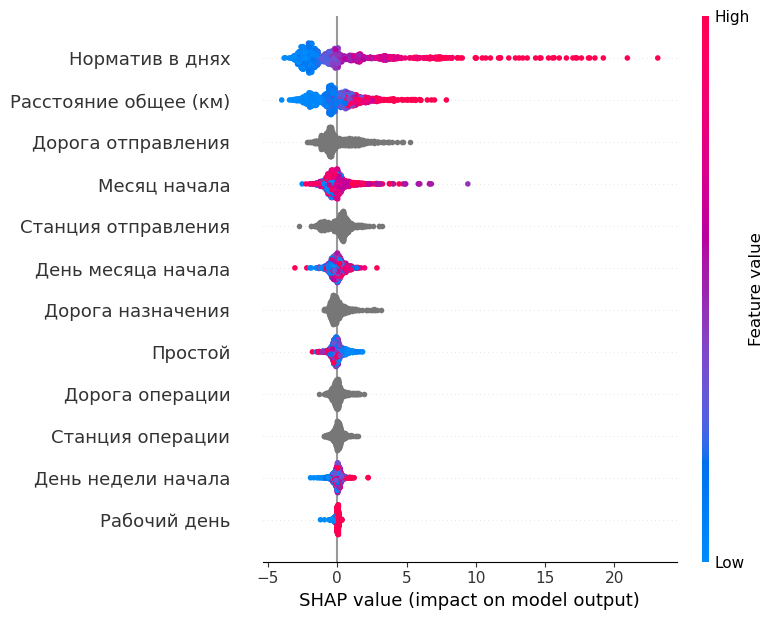

In [ ]:
import shap

# SHAP —Ä–∞–±–æ—Ç–∞–µ—Ç —Å model.get_booster()._predictor, –Ω–æ —É CatBoost –µ—Å—Ç—å —Å–≤–æ–π explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# –ì–ª–æ–±–∞–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ (summary plot)
shap.summary_plot(shap_values, X_test)

# –í–ª–∏—è–Ω–∏–µ –Ω–∞ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π –æ–±—ä–µ–∫—Ç (–Ω–∞–ø—Ä–∏–º–µ—Ä, 5-—è —Å—Ç—Ä–æ–∫–∞)
shap.force_plot(explainer.expected_value, shap_values[5], X_test.iloc[5])
